In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('no-outlier.csv')
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21
155403,155403,8.680778,4.261679,-0.159214,21
155404,155404,8.756194,4.168306,-0.144251,21
155405,155405,8.662222,4.219781,-0.183755,21


In [3]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['Class'])
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class,label
0,0,2.660984,-9.653030,0.470237,1,0
1,1,2.223091,-9.432167,2.223091,1,0
2,2,2.098372,-9.481953,0.926070,1,0
3,3,2.716461,-9.739352,0.912008,1,0
4,4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21,20
155403,155403,8.680778,4.261679,-0.159214,21,20
155404,155404,8.756194,4.168306,-0.144251,21,20
155405,155405,8.662222,4.219781,-0.183755,21,20


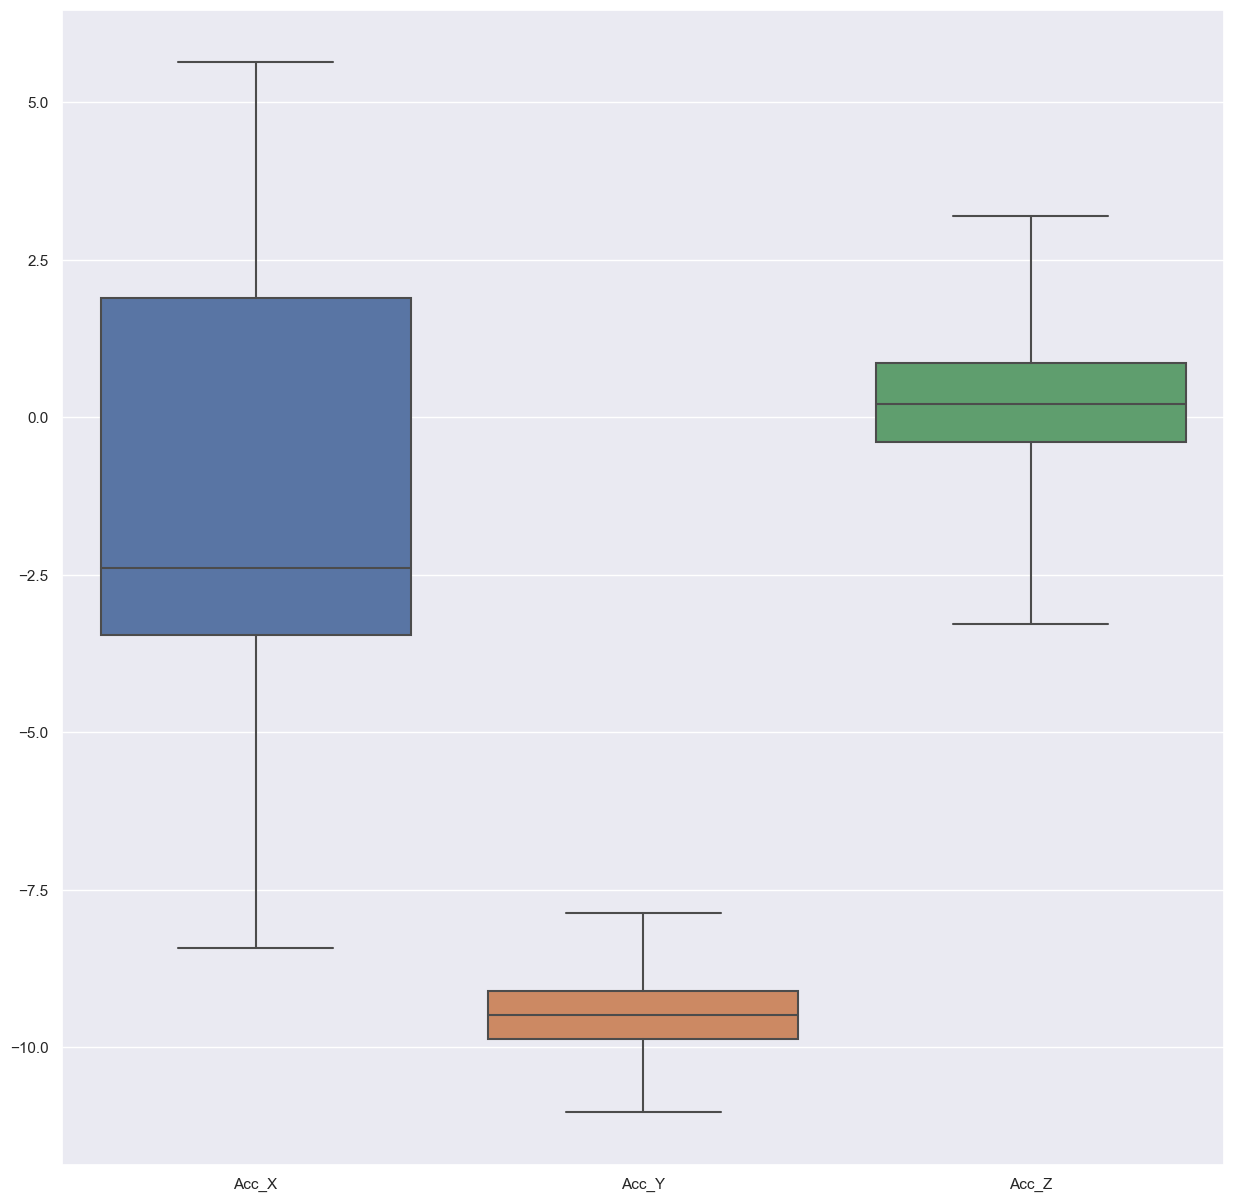

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,1:4],whis=[0, 100])
count=0

In [7]:
dfn = data.drop('Unnamed: 0', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [8]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [9]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [10]:
X

,Acc_X,Acc_Y,Acc_Z
0,2.660984,-9.653030,0.470237
1,2.223091,-9.432167,2.223091
2,2.098372,-9.481953,0.926070
3,2.716461,-9.739352,0.912008
4,2.288388,-9.371498,0.910390
...,...,...,...
155402,8.701128,4.238336,-0.194529
155403,8.680778,4.261679,-0.159214
155404,8.756194,4.168306,-0.144251
155405,8.662222,4.219781,-0.183755


In [11]:
y

0          0
1          0
2          0
3          0
4          0
          ..
155402    20
155403    20
155404    20
155405    20
155406    20
Name: label, Length: 155407, dtype: int64

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.985481,-0.807007,-0.491449,1.365267,0
1,0.865844,-0.763546,-0.059973,1.155978,0
2,0.831769,-0.773343,-0.379243,1.197382,0
3,1.000638,-0.823993,-0.382704,1.351556,0
4,0.883684,-0.751608,-0.383103,1.221712,0


In [13]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)


In [14]:
scaled_X

,mag,label
0,1.365267,0
1,1.155978,0
2,1.197382,0
3,1.351556,0
4,1.221712,0
...,...,...
155402,3.329777,20
155403,3.326341,20
155404,3.331364,20
155405,3.318731,20


In [15]:
import scipy.stats as stats


In [108]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 5
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_7304\4114532512.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [ ]:
frames

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [111]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [112]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (1551, 400)
LABELS:  0
LABELS:  (1551,)


In [113]:
x=frames
y=labels

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [116]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [117]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


In [118]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [119]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 64)


In [120]:
import torch.nn as nn
from torch.nn import functional as f

"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [121]:
"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out


In [122]:
import torch.nn.functional as F


In [123]:
class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [124]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [139]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=21).to(device)

In [140]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [141]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [142]:
best_acc = 0
best_f1 = 0

In [143]:
import os
import argparse
import time
import random
import torch.optim as optim

In [144]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [145]:
start_time = time.time()

In [146]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001


In [147]:
epochs=201

In [148]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


In [149]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')


In [150]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))


In [151]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg


In [152]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
            
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  


Start of epoch NO: 0
Epoch: [0][0/19]	Loss 3.2016 (3.2016)	accuracy 0.000 (0.000)	f1_score 0.000 (0.000)
Epoch: [0][5/19]	Loss 2.5284 (2.7301)	accuracy 9.375 (10.938)	f1_score 4.731 (6.316)
Epoch: [0][10/19]	Loss 2.2316 (2.5330)	accuracy 23.438 (15.057)	f1_score 17.283 (9.838)
Epoch: [0][15/19]	Loss 2.2724 (2.4534)	accuracy 26.562 (18.457)	f1_score 15.507 (12.415)
 Test: accuracy 10.938 f1_score 3.623
Training time:  7.551445484161377 Hour:  0 Minute:  0 Second:  7 Test best accuracy: 10.9375  Test best f1 score: 0

Start of epoch NO: 1
Epoch: [1][0/19]	Loss 2.2995 (2.2995)	accuracy 21.875 (21.875)	f1_score 14.363 (14.363)
Epoch: [1][5/19]	Loss 1.9878 (2.1742)	accuracy 34.375 (24.740)	f1_score 23.231 (18.114)
Epoch: [1][10/19]	Loss 2.1458 (2.1542)	accuracy 26.562 (25.284)	f1_score 18.153 (18.268)
Epoch: [1][15/19]	Loss 2.1775 (2.1427)	accuracy 20.312 (25.488)	f1_score 15.153 (18.248)
 Test: accuracy 16.016 f1_score 7.545
Training time:  10.444706439971924 Hour:  0 Minute:  0 Second:  

Epoch: [15][10/19]	Loss 1.6163 (1.2810)	accuracy 42.188 (51.989)	f1_score 40.915 (46.682)
Epoch: [15][15/19]	Loss 1.2055 (1.2562)	accuracy 51.562 (52.539)	f1_score 45.357 (46.737)
 Test: accuracy 47.266 f1_score 38.549
Training time:  51.90219187736511 Hour:  0 Minute:  0 Second:  51 Test best accuracy: 56.25  Test best f1 score: 0

Start of epoch NO: 16
Epoch: [16][0/19]	Loss 1.2242 (1.2242)	accuracy 62.500 (62.500)	f1_score 57.707 (57.707)
Epoch: [16][5/19]	Loss 1.2335 (1.1483)	accuracy 50.000 (55.208)	f1_score 45.670 (50.181)
Epoch: [16][10/19]	Loss 1.0353 (1.2324)	accuracy 57.812 (51.278)	f1_score 48.360 (44.606)
Epoch: [16][15/19]	Loss 1.1847 (1.2100)	accuracy 53.125 (53.125)	f1_score 46.410 (46.064)
 Test: accuracy 42.969 f1_score 36.964
Training time:  55.20479106903076 Hour:  0 Minute:  0 Second:  55 Test best accuracy: 56.25  Test best f1 score: 0

Start of epoch NO: 17
Epoch: [17][0/19]	Loss 1.0479 (1.0479)	accuracy 65.625 (65.625)	f1_score 53.052 (53.052)
Epoch: [17][5/19]	L

 Test: accuracy 59.375 f1_score 53.809
Training time:  97.79005336761475 Hour:  0 Minute:  1 Second:  37 Test best accuracy: 59.375  Test best f1 score: 0

Start of epoch NO: 31
Epoch: [31][0/19]	Loss 0.9010 (0.9010)	accuracy 64.062 (64.062)	f1_score 59.982 (59.982)
Epoch: [31][5/19]	Loss 0.7587 (0.8417)	accuracy 70.312 (66.406)	f1_score 57.673 (61.269)
Epoch: [31][10/19]	Loss 0.9217 (0.8197)	accuracy 67.188 (68.182)	f1_score 57.559 (62.497)
Epoch: [31][15/19]	Loss 0.9259 (0.8448)	accuracy 68.750 (67.676)	f1_score 63.829 (62.492)
 Test: accuracy 45.312 f1_score 39.378
Training time:  100.83423185348511 Hour:  0 Minute:  1 Second:  40 Test best accuracy: 59.375  Test best f1 score: 0

Start of epoch NO: 32
Epoch: [32][0/19]	Loss 0.6793 (0.6793)	accuracy 78.125 (78.125)	f1_score 73.441 (73.441)
Epoch: [32][5/19]	Loss 0.8037 (0.7693)	accuracy 65.625 (69.271)	f1_score 60.771 (62.879)
Epoch: [32][10/19]	Loss 0.8242 (0.8156)	accuracy 71.875 (68.892)	f1_score 66.144 (63.558)
Epoch: [32][15/19

Epoch: [46][5/19]	Loss 0.5438 (0.5555)	accuracy 78.125 (79.427)	f1_score 71.107 (76.094)
Epoch: [46][10/19]	Loss 0.6652 (0.6161)	accuracy 75.000 (78.125)	f1_score 69.105 (73.964)
Epoch: [46][15/19]	Loss 0.6296 (0.6679)	accuracy 75.000 (75.684)	f1_score 70.768 (71.984)
 Test: accuracy 64.453 f1_score 59.393
Training time:  147.90381264686584 Hour:  0 Minute:  2 Second:  27 Test best accuracy: 64.453125  Test best f1 score: 0

Start of epoch NO: 47
Epoch: [47][0/19]	Loss 0.4799 (0.4799)	accuracy 78.125 (78.125)	f1_score 77.385 (77.385)
Epoch: [47][5/19]	Loss 0.7106 (0.6978)	accuracy 78.125 (73.177)	f1_score 73.755 (68.825)
Epoch: [47][10/19]	Loss 0.7274 (0.7321)	accuracy 68.750 (71.591)	f1_score 67.732 (67.790)
Epoch: [47][15/19]	Loss 0.5593 (0.7126)	accuracy 81.250 (72.070)	f1_score 72.993 (67.302)
 Test: accuracy 50.000 f1_score 42.883
Training time:  151.31313467025757 Hour:  0 Minute:  2 Second:  31 Test best accuracy: 64.453125  Test best f1 score: 0

Start of epoch NO: 48
Epoch: [4

Epoch: [61][15/19]	Loss 0.4930 (0.4652)	accuracy 81.250 (82.324)	f1_score 78.762 (78.621)
 Test: accuracy 55.469 f1_score 48.743
Training time:  195.21246719360352 Hour:  0 Minute:  3 Second:  15 Test best accuracy: 67.1875  Test best f1 score: 0

Start of epoch NO: 62
Epoch: [62][0/19]	Loss 0.4011 (0.4011)	accuracy 85.938 (85.938)	f1_score 84.115 (84.115)
Epoch: [62][5/19]	Loss 0.4792 (0.4511)	accuracy 84.375 (84.896)	f1_score 77.436 (81.102)
Epoch: [62][10/19]	Loss 0.4995 (0.4699)	accuracy 82.812 (82.955)	f1_score 83.679 (79.924)
Epoch: [62][15/19]	Loss 0.3666 (0.4606)	accuracy 85.938 (82.227)	f1_score 79.971 (79.120)
 Test: accuracy 60.938 f1_score 55.283
Training time:  198.28624773025513 Hour:  0 Minute:  3 Second:  18 Test best accuracy: 67.1875  Test best f1 score: 0

Start of epoch NO: 63
Epoch: [63][0/19]	Loss 0.5729 (0.5729)	accuracy 76.562 (76.562)	f1_score 73.007 (73.007)
Epoch: [63][5/19]	Loss 0.3350 (0.4544)	accuracy 89.062 (82.031)	f1_score 89.798 (77.166)
Epoch: [63][10

Epoch: [77][5/19]	Loss 0.3493 (0.5151)	accuracy 85.938 (78.385)	f1_score 82.484 (75.483)
Epoch: [77][10/19]	Loss 0.4228 (0.4653)	accuracy 87.500 (81.676)	f1_score 84.124 (78.040)
Epoch: [77][15/19]	Loss 0.6837 (0.4746)	accuracy 75.000 (80.762)	f1_score 72.110 (77.934)
 Test: accuracy 67.578 f1_score 63.847
Training time:  244.02675485610962 Hour:  0 Minute:  4 Second:  4 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 78
Epoch: [78][0/19]	Loss 0.4101 (0.4101)	accuracy 81.250 (81.250)	f1_score 80.061 (80.061)
Epoch: [78][5/19]	Loss 0.6530 (0.4409)	accuracy 78.125 (82.552)	f1_score 78.141 (79.687)
Epoch: [78][10/19]	Loss 0.6914 (0.4431)	accuracy 73.438 (82.955)	f1_score 73.830 (80.892)
Epoch: [78][15/19]	Loss 0.4358 (0.4748)	accuracy 82.812 (81.934)	f1_score 77.133 (78.744)
 Test: accuracy 67.188 f1_score 64.210
Training time:  247.08565640449524 Hour:  0 Minute:  4 Second:  7 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 79
Epoch: [79]

Epoch: [92][15/19]	Loss 0.3514 (0.4030)	accuracy 89.062 (83.984)	f1_score 79.964 (81.023)
 Test: accuracy 49.609 f1_score 43.988
Training time:  289.76044845581055 Hour:  0 Minute:  4 Second:  49 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 93
Epoch: [93][0/19]	Loss 0.6745 (0.6745)	accuracy 76.562 (76.562)	f1_score 72.075 (72.075)
Epoch: [93][5/19]	Loss 0.6170 (0.4524)	accuracy 71.875 (83.073)	f1_score 70.852 (79.231)
Epoch: [93][10/19]	Loss 0.3537 (0.4400)	accuracy 84.375 (83.239)	f1_score 81.324 (80.605)
Epoch: [93][15/19]	Loss 0.3354 (0.4303)	accuracy 85.938 (83.691)	f1_score 78.591 (80.560)
 Test: accuracy 54.297 f1_score 48.425
Training time:  292.8791561126709 Hour:  0 Minute:  4 Second:  52 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 94
Epoch: [94][0/19]	Loss 0.2948 (0.2948)	accuracy 90.625 (90.625)	f1_score 90.170 (90.170)
Epoch: [94][5/19]	Loss 0.4097 (0.3817)	accuracy 79.688 (83.594)	f1_score 78.651 (78.973)
Epoch: [94]

 Test: accuracy 59.766 f1_score 52.316
Training time:  335.67612171173096 Hour:  0 Minute:  5 Second:  35 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 108
Epoch: [108][0/19]	Loss 0.2444 (0.2444)	accuracy 89.062 (89.062)	f1_score 87.632 (87.632)
Epoch: [108][5/19]	Loss 0.4347 (0.3316)	accuracy 89.062 (86.719)	f1_score 86.284 (84.667)
Epoch: [108][10/19]	Loss 0.3077 (0.3372)	accuracy 89.062 (86.080)	f1_score 85.500 (83.610)
Epoch: [108][15/19]	Loss 0.3635 (0.3361)	accuracy 89.062 (86.914)	f1_score 88.180 (84.412)
 Test: accuracy 67.578 f1_score 63.584
Training time:  338.7220153808594 Hour:  0 Minute:  5 Second:  38 Test best accuracy: 71.484375  Test best f1 score: 0

Start of epoch NO: 109
Epoch: [109][0/19]	Loss 0.4690 (0.4690)	accuracy 84.375 (84.375)	f1_score 82.689 (82.689)
Epoch: [109][5/19]	Loss 0.3377 (0.3571)	accuracy 84.375 (86.719)	f1_score 79.762 (85.219)
Epoch: [109][10/19]	Loss 0.3641 (0.3404)	accuracy 85.938 (86.222)	f1_score 82.815 (83.838)
Ep

Epoch: [123][5/19]	Loss 0.2268 (0.2990)	accuracy 93.750 (88.542)	f1_score 94.261 (86.652)
Epoch: [123][10/19]	Loss 0.3106 (0.2829)	accuracy 89.062 (89.915)	f1_score 88.603 (87.979)
Epoch: [123][15/19]	Loss 0.1982 (0.2796)	accuracy 93.750 (90.039)	f1_score 89.751 (86.951)
 Test: accuracy 58.984 f1_score 54.745
Training time:  384.8740839958191 Hour:  0 Minute:  6 Second:  24 Test best accuracy: 74.21875  Test best f1 score: 0

Start of epoch NO: 124
Epoch: [124][0/19]	Loss 0.2138 (0.2138)	accuracy 92.188 (92.188)	f1_score 85.006 (85.006)
Epoch: [124][5/19]	Loss 0.3035 (0.2888)	accuracy 81.250 (86.979)	f1_score 80.056 (84.894)
Epoch: [124][10/19]	Loss 0.4055 (0.3001)	accuracy 82.812 (86.790)	f1_score 77.051 (83.879)
Epoch: [124][15/19]	Loss 0.3523 (0.3015)	accuracy 85.938 (87.109)	f1_score 82.540 (84.230)
 Test: accuracy 61.719 f1_score 57.704
Training time:  387.96478366851807 Hour:  0 Minute:  6 Second:  27 Test best accuracy: 74.21875  Test best f1 score: 0

Start of epoch NO: 125
Epo

Epoch: [138][10/19]	Loss 0.5075 (0.4279)	accuracy 76.562 (84.233)	f1_score 75.285 (81.667)
Epoch: [138][15/19]	Loss 0.2770 (0.4021)	accuracy 89.062 (84.082)	f1_score 84.590 (81.504)
 Test: accuracy 61.719 f1_score 57.323
Training time:  431.1512792110443 Hour:  0 Minute:  7 Second:  11 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 139
Epoch: [139][0/19]	Loss 0.2990 (0.2990)	accuracy 89.062 (89.062)	f1_score 87.355 (87.355)
Epoch: [139][5/19]	Loss 0.2557 (0.2286)	accuracy 90.625 (91.927)	f1_score 87.317 (89.343)
Epoch: [139][10/19]	Loss 0.3470 (0.2894)	accuracy 90.625 (90.341)	f1_score 86.857 (87.958)
Epoch: [139][15/19]	Loss 0.3265 (0.2779)	accuracy 81.250 (89.844)	f1_score 80.397 (86.968)
 Test: accuracy 60.547 f1_score 54.260
Training time:  434.21769285202026 Hour:  0 Minute:  7 Second:  14 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 140
Epoch: [140][0/19]	Loss 0.3202 (0.3202)	accuracy 89.062 (89.062)	f1_score 83.761 (83.761)
E

Epoch: [153][15/19]	Loss 0.6557 (0.2776)	accuracy 76.562 (90.137)	f1_score 72.494 (88.509)
 Test: accuracy 43.750 f1_score 36.952
Training time:  477.41299510002136 Hour:  0 Minute:  7 Second:  57 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 154
Epoch: [154][0/19]	Loss 0.4479 (0.4479)	accuracy 82.812 (82.812)	f1_score 79.236 (79.236)
Epoch: [154][5/19]	Loss 0.3711 (0.2903)	accuracy 92.188 (89.844)	f1_score 88.879 (86.859)
Epoch: [154][10/19]	Loss 0.3227 (0.3058)	accuracy 85.938 (87.926)	f1_score 85.986 (86.054)
Epoch: [154][15/19]	Loss 0.2418 (0.3080)	accuracy 90.625 (88.184)	f1_score 85.127 (86.482)
 Test: accuracy 53.125 f1_score 45.967
Training time:  480.487770318985 Hour:  0 Minute:  8 Second:  0 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 155
Epoch: [155][0/19]	Loss 0.2747 (0.2747)	accuracy 92.188 (92.188)	f1_score 91.635 (91.635)
Epoch: [155][5/19]	Loss 0.2692 (0.2974)	accuracy 89.062 (89.844)	f1_score 82.810 (87.296)
Epoc

 Test: accuracy 64.453 f1_score 59.147
Training time:  523.8376107215881 Hour:  0 Minute:  8 Second:  43 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 169
Epoch: [169][0/19]	Loss 0.2393 (0.2393)	accuracy 89.062 (89.062)	f1_score 84.482 (84.482)
Epoch: [169][5/19]	Loss 0.2155 (0.2283)	accuracy 89.062 (90.885)	f1_score 87.619 (87.739)
Epoch: [169][10/19]	Loss 0.3205 (0.2434)	accuracy 85.938 (90.625)	f1_score 81.892 (88.090)
Epoch: [169][15/19]	Loss 0.2569 (0.2412)	accuracy 90.625 (91.309)	f1_score 86.712 (89.098)
 Test: accuracy 67.578 f1_score 61.984
Training time:  526.9094424247742 Hour:  0 Minute:  8 Second:  46 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 170
Epoch: [170][0/19]	Loss 0.2807 (0.2807)	accuracy 85.938 (85.938)	f1_score 78.314 (78.314)
Epoch: [170][5/19]	Loss 0.1865 (0.1903)	accuracy 90.625 (92.708)	f1_score 91.345 (91.652)
Epoch: [170][10/19]	Loss 0.2838 (0.2286)	accuracy 90.625 (90.625)	f1_score 88.672 (89.020)
Epo

Epoch: [184][5/19]	Loss 0.2842 (0.2114)	accuracy 92.188 (93.490)	f1_score 91.339 (91.844)
Epoch: [184][10/19]	Loss 0.3379 (0.2103)	accuracy 89.062 (93.040)	f1_score 88.504 (91.136)
Epoch: [184][15/19]	Loss 0.1948 (0.1975)	accuracy 90.625 (92.969)	f1_score 91.607 (90.940)
 Test: accuracy 63.672 f1_score 57.085
Training time:  573.2695670127869 Hour:  0 Minute:  9 Second:  33 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 185
Epoch: [185][0/19]	Loss 0.1258 (0.1258)	accuracy 95.312 (95.312)	f1_score 90.986 (90.986)
Epoch: [185][5/19]	Loss 0.1329 (0.1654)	accuracy 96.875 (92.969)	f1_score 93.615 (91.824)
Epoch: [185][10/19]	Loss 0.1801 (0.1778)	accuracy 95.312 (93.182)	f1_score 96.107 (92.213)
Epoch: [185][15/19]	Loss 0.1772 (0.1951)	accuracy 92.188 (92.090)	f1_score 84.989 (90.615)
 Test: accuracy 72.656 f1_score 68.932
Training time:  576.370275259018 Hour:  0 Minute:  9 Second:  36 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 186
Epo

Epoch: [199][10/19]	Loss 0.1137 (0.2200)	accuracy 96.875 (92.188)	f1_score 97.857 (91.112)
Epoch: [199][15/19]	Loss 0.2258 (0.2719)	accuracy 92.188 (90.234)	f1_score 79.955 (88.393)
 Test: accuracy 66.406 f1_score 63.339
Training time:  619.898716211319 Hour:  0 Minute:  10 Second:  19 Test best accuracy: 75.390625  Test best f1 score: 0

Start of epoch NO: 200
Epoch: [200][0/19]	Loss 0.1462 (0.1462)	accuracy 93.750 (93.750)	f1_score 94.125 (94.125)
Epoch: [200][5/19]	Loss 0.2203 (0.1943)	accuracy 92.188 (92.969)	f1_score 84.195 (90.336)
Epoch: [200][10/19]	Loss 0.2782 (0.2274)	accuracy 89.062 (91.051)	f1_score 83.417 (87.972)
Epoch: [200][15/19]	Loss 0.2182 (0.2449)	accuracy 93.750 (90.527)	f1_score 93.921 (87.566)
 Test: accuracy 68.750 f1_score 65.372
Training time:  623.0054059028625 Hour:  0 Minute:  10 Second:  23 Test best accuracy: 75.390625  Test best f1 score: 0
